In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('ESSdata_Thinkful.csv')

df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [9]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.594000e+03,8594.000000,8586.000000,8580.000000,8555.000000,8569.000000,8563.000000,8579.000000,8500.000000,8584.000000,8355.000000,8577.000000
mean,3.954938e+04,6.500000,3.861985,5.559907,6.005143,5.319874,7.694616,5.192563,2.748941,1.497204,47.470736,1.384867
std,6.267259e+05,0.500029,2.019689,2.233700,2.129866,2.173449,1.735904,1.457643,0.905477,0.500021,18.397369,0.486592
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.052000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.714000e+03,6.500000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.745000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,62.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


In [10]:
df = df.dropna()

#### Separate out the countries

In [11]:
# Creating a few dataframes with the data separated by country:

spain = df.loc[df['cntry'] == 'ES']
sweden = df.loc[df['cntry'] == 'SE']
swiss = df.loc[df['cntry'] == 'CH']
norway = df.loc[df['cntry'] == 'NO']
czech = df.loc[df['cntry'] == 'CZ']
denmark = df.loc[df['cntry'] == 'DE']

In [25]:
countries = [spain, sweden, swiss, norway, czech, denmark]

#### Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

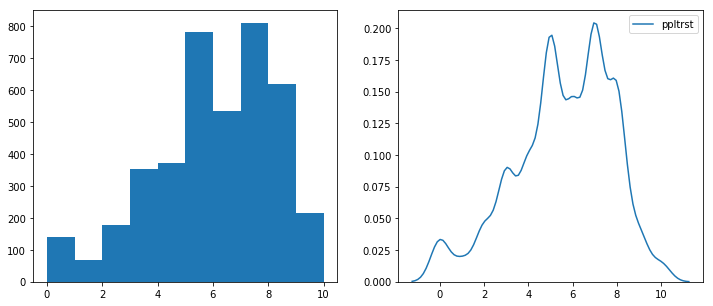

In [12]:
# Looking at the distribution visually:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

ax1.hist(df.loc[df['year'] == 6, 'ppltrst'])

ax2 = sns.kdeplot(df.loc[df['year'] == 6, 'ppltrst'])

plt.show()

In [20]:
trust_2012 = df.loc[df['year'] == 6, 'ppltrst']
trust_2014 = df.loc[df['year'] == 7, 'ppltrst'][:4071]

In [16]:
trust_2012.shape

(4071,)

In [21]:
trust_2014.shape

(4071,)

In [23]:
from scipy.stats import ttest_rel

ttest_rel(trust_2012, 
          trust_2014,
          axis = 0)

Ttest_relResult(statistic=0.15797212748857214, pvalue=0.8744865987427111)

In [29]:
print(spain.loc[spain['year'] == 6, 'ppltrst'].shape )
print(spain.loc[spain['year'] == 7, 'ppltrst'].shape)

(1158,)
(1134,)


In [31]:
print(sweden.loc[sweden['year'] == 6, 'ppltrst'].shape )
print(sweden.loc[sweden['year'] == 7, 'ppltrst'].shape)

(859,)
(867,)


In [35]:
print('Spain:')
print(ttest_rel(spain.loc[spain['year'] == 6, 'ppltrst'][:1134], 
          spain.loc[spain['year'] == 7, 'ppltrst'],
          axis = 0))

print('\nSweden:')
print(ttest_rel(sweden.loc[sweden['year'] == 6, 'ppltrst'], 
                sweden.loc[sweden['year'] == 7, 'ppltrst'][:859],
                axis = 0))

Spain:
Ttest_relResult(statistic=2.1512250255992353, pvalue=0.03166935799305661)

Sweden:
Ttest_relResult(statistic=-2.074422015535839, pvalue=0.0383378027404032)


#### Question 2 - Did people become happier from 2012 to 2014?

In [36]:
# This takes care of rare instances where an id was only found in one of the years:

def double_id_issue(df):
    
    beta = df['idno'].value_counts()
    delta = beta.loc[beta == 1]
            
    ids = list()

    for x in delta.index:
        ids.append(x)

    for x in ids:
        gamma = df.loc[df['idno'] == x].index
        df.drop(index = gamma, axis = 0, inplace = True)

In [39]:
# Taking care of the double-ids:

for country in countries:
     country = double_id_issue(country)

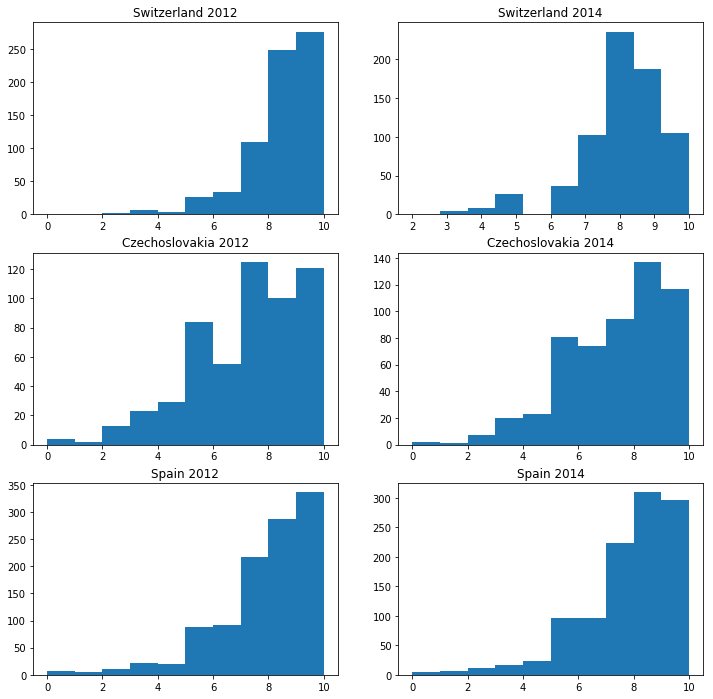

In [44]:
# Looking at the distributions visually:

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (12, 12))

ax1.hist(swiss.loc[swiss['year'] == 6, 'happy'])
ax1.set_title('Switzerland 2012')
ax2.hist(swiss.loc[swiss['year'] == 7, 'happy'])
ax2.set_title('Switzerland 2014')

ax3.hist(czech.loc[czech['year'] == 6, 'happy'])
ax3.set_title('Czechoslovakia 2012')
ax4.hist(czech.loc[czech['year'] == 7, 'happy'])
ax4.set_title('Czechoslovakia 2014')

ax5.hist(spain.loc[spain['year'] == 6, 'happy'])
ax5.set_title('Spain 2012')
ax6.hist(spain.loc[spain['year'] == 7, 'happy'])
ax6.set_title('Spain 2014')

plt.show()

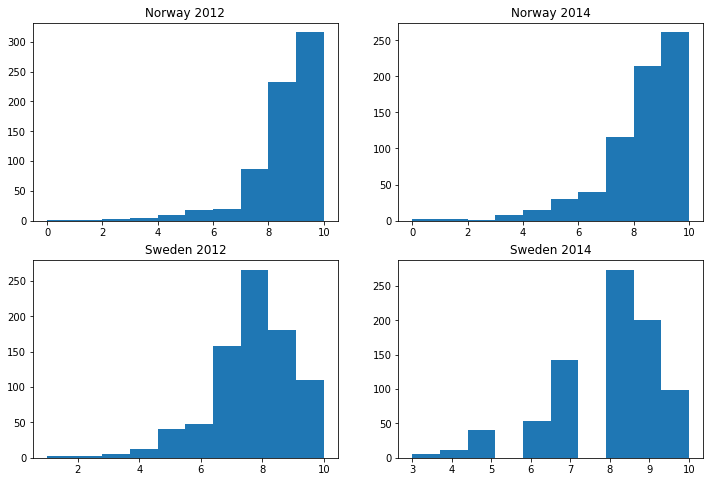

In [42]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (12, 8))

ax1.hist(norway.loc[norway['year'] == 6, 'happy'])
ax1.set_title('Norway 2012')
ax2.hist(norway.loc[norway['year'] == 7, 'happy'])
ax2.set_title('Norway 2014')

ax3.hist(sweden.loc[sweden['year'] == 6, 'happy'])
ax3.set_title('Sweden 2012')
ax4.hist(sweden.loc[sweden['year'] == 7, 'happy'])
ax4.set_title('Sweden 2014')

plt.show()

In [60]:
# Make a function for this

def ttests(countries, col):
    
    for x in countries:
        x = x.reset_index(drop=True)
        print(x['cntry'][0] +':')
        print(ttest_rel(x.loc[x['year'] == 6, col], 
                        x.loc[x['year'] == 7, col],
                        axis = 0))

In [61]:
ttests(countries, 'happy')

ES:
Ttest_relResult(statistic=1.1536991743704812, pvalue=0.24887782739414913)
SE:
Ttest_relResult(statistic=-0.6384492287141238, pvalue=0.5233582659256348)
CH:
Ttest_relResult(statistic=-0.6381807181533017, pvalue=0.5235629899907343)
NO:
Ttest_relResult(statistic=4.247265501657781, pvalue=2.461690621787065e-05)
CZ:
Ttest_relResult(statistic=-1.2928814445749852, pvalue=0.19659000204950752)
DE:
Ttest_relResult(statistic=-1.144805749801318, pvalue=0.2746101293755968)


In [62]:
from scipy.stats import wilcoxon

def wilcoxons(countries, col):
    
    for country in countries:
        country = country.reset_index(drop=True)
        print(country['cntry'][0] +':')
        print(wilcoxon(x = country.loc[country['year'] == 6, col],
                       y = country.loc[country['year'] == 7, col]))

In [63]:
wilcoxons(countries, 'happy')

ES:
WilcoxonResult(statistic=190064.5, pvalue=0.1573993272703731)
SE:
WilcoxonResult(statistic=103562.0, pvalue=0.5895941229841813)
CH:
WilcoxonResult(statistic=75726.5, pvalue=0.7575607435639675)
NO:
WilcoxonResult(statistic=60547.0, pvalue=1.4306917852645772e-05)
CZ:
WilcoxonResult(statistic=55932.0, pvalue=0.22849644123659796)
DE:
WilcoxonResult(statistic=16.0, pvalue=0.2365019314807173)


#### Question 3 - Who reported watching more TV in 2012, men or women?

In [64]:
# Isolating the groups in question:

male = df.loc[(df['year'] == 6)&(df['gndr'] == 1)]
female = df.loc[(df['year'] == 6)&(df['gndr'] == 2)]

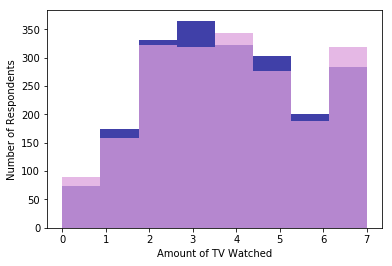

In [70]:
plt.hist(male['tvtot'], color = 'darkblue', alpha=.75, bins=8)
plt.hist(female['tvtot'], color = 'plum', alpha=.75, bins=8)
plt.xlabel('Amount of TV Watched')
plt.ylabel('Number of Respondents')
plt.show()

In [71]:
from scipy.stats import ttest_ind

results_3 = ttest_ind(male['tvtot'], 
                      female['tvtot'])

In [72]:
print("The T-Statistic is: {}.\nThe P-Value is: {}".format(results_3.statistic, 
                                                            results_3.pvalue))

The T-Statistic is: -0.7323552192640558.
The P-Value is: 0.4639939646110154


The P-value is way off, so you cannot claim a significant difference between the two groups.

#### Question 4 - Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [73]:
# Isolating the groups in question:

couple = df.loc[(df['year'] == 6)&(df['partner'] == 1)]
alone = df.loc[(df['year'] == 6)&(df['partner'] == 2)]

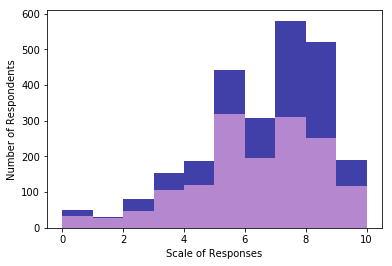

In [74]:
plt.hist(couple['pplfair'], color = 'darkblue', alpha=.75)
plt.hist(alone['pplfair'], color = 'plum', alpha=.75)
plt.xlabel('Scale of Responses')
plt.ylabel('Number of Respondents')
plt.show()

In [76]:
couple['pplfair'].describe()

count    2542.000000
mean        6.074351
std         2.102916
min         0.000000
25%         5.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: pplfair, dtype: float64

In [75]:
alone['pplfair'].describe()

count    1529.000000
mean        5.865925
std         2.138453
min         0.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: pplfair, dtype: float64

In [77]:
results = ttest_ind(couple['pplfair'], 
                    alone['pplfair'])

print("The T-Statistic is: {}.\nThe P-Value is: {}".format(results.statistic, 
                                                           results.pvalue))

The T-Statistic is: 3.0430439318464235.
The P-Value is: 0.002356936676939248


While the P-Value here keeps the hypothesis in play, then key thing here is the imbalance between the two sets. There were far more respondents who were couples as opposed to single. This could end up being significant if put into a production environment.

#### Question 5: Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

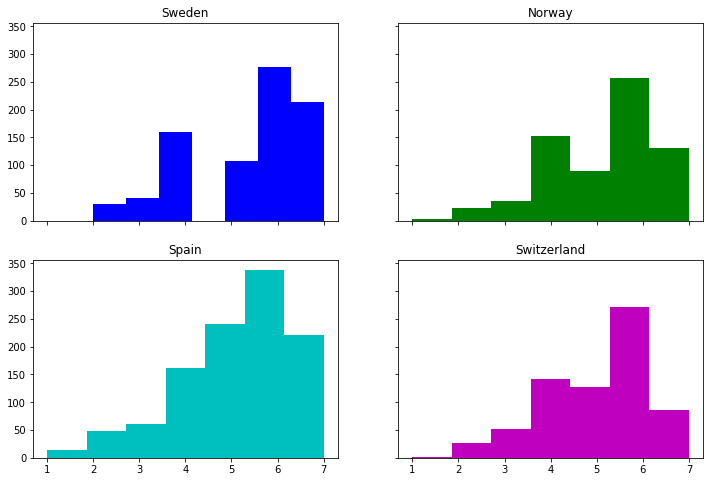

In [98]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (12, 8), sharey = True, sharex = True)

ax1.hist(sweden.loc[sweden['year'] == 7, 'sclmeet'], color = 'b', bins=7)
ax1.set_title('Sweden')

ax2.hist(norway.loc[norway['year'] == 7, 'sclmeet'], color = 'g', bins=7)
ax2.set_title('Norway')

ax3.hist(spain.loc[spain['year'] == 7, 'sclmeet'], color = 'c', bins=7)
ax3.set_title('Spain')

ax4.hist(swiss.loc[swiss['year'] == 7, 'sclmeet'], color = 'm', bins=7)
ax4.set_title('Switzerland')

plt.show()

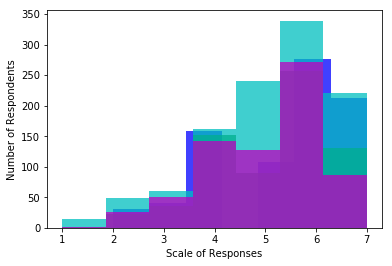

In [85]:
hist_kw = {'alpha':.75, 'bins':7}
plt.hist(sweden.loc[sweden['year'] == 7, 'sclmeet'], color = 'b', **hist_kw)
plt.hist(norway.loc[norway['year'] == 7, 'sclmeet'], color = 'g', **hist_kw)
plt.hist(spain.loc[spain['year'] == 7, 'sclmeet'], color = 'c', **hist_kw)
plt.hist(swiss.loc[swiss['year'] == 7, 'sclmeet'], color = 'm', **hist_kw)
plt.xlabel('Scale of Responses')
plt.ylabel('Number of Respondents')
plt.show()

In [90]:
countries = [sweden, norway, spain, swiss]

for country in countries:
    country = country.reset_index(drop=True)
    print('\n'+country['cntry'][0] +':')
    print(country.loc[country['year'] == 7, 'sclmeet'].describe())


SE:
count    827.000000
mean       5.448609
std        1.371875
min        2.000000
25%        4.000000
50%        6.000000
75%        7.000000
max        7.000000
Name: sclmeet, dtype: float64

NO:
count    689.000000
mean       5.314949
std        1.346106
min        1.000000
25%        4.000000
50%        6.000000
75%        6.000000
max        7.000000
Name: sclmeet, dtype: float64

ES:
count    1085.000000
mean        5.273733
std         1.427104
min         1.000000
25%         4.000000
50%         6.000000
75%         6.000000
max         7.000000
Name: sclmeet, dtype: float64

CH:
count    707.000000
mean       5.161245
std        1.308946
min        1.000000
25%        4.000000
50%        6.000000
75%        6.000000
max        7.000000
Name: sclmeet, dtype: float64


In [94]:
from scipy.stats import f_oneway

results = f_oneway(sweden.loc[sweden['year'] == 7, 'sclmeet'], 
                   norway.loc[norway['year'] == 7, 'sclmeet'], 
                   spain.loc[spain['year'] == 7, 'sclmeet'],
                   swiss.loc[swiss['year'] == 7, 'sclmeet'])

print("The Statistic is: {}.\nThe P-Value is: {}".format(results.statistic, 
                                                           results.pvalue))

The Statistic is: 5.802912227985507.
The P-Value is: 0.0005943173486419015


We use ANOVA here because there is more than two groups. Again, the class imbalance here could be a problem. Yhe main value we are looking at is the P-Value, which comes out more than low enough to hint at something statistically significant. From the graphs, along with the ANOVA test, we can reasonably presume that the Swedes go out more than the others.

#### Question 6: Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [95]:
swiss_14 = swiss.loc[(swiss['year'] == 7)]
norway_14 = norway.loc[norway['year'] == 7]
spain_14 = spain.loc[spain['year'] == 7]
sweden_14 = sweden.loc[sweden['year'] == 7]

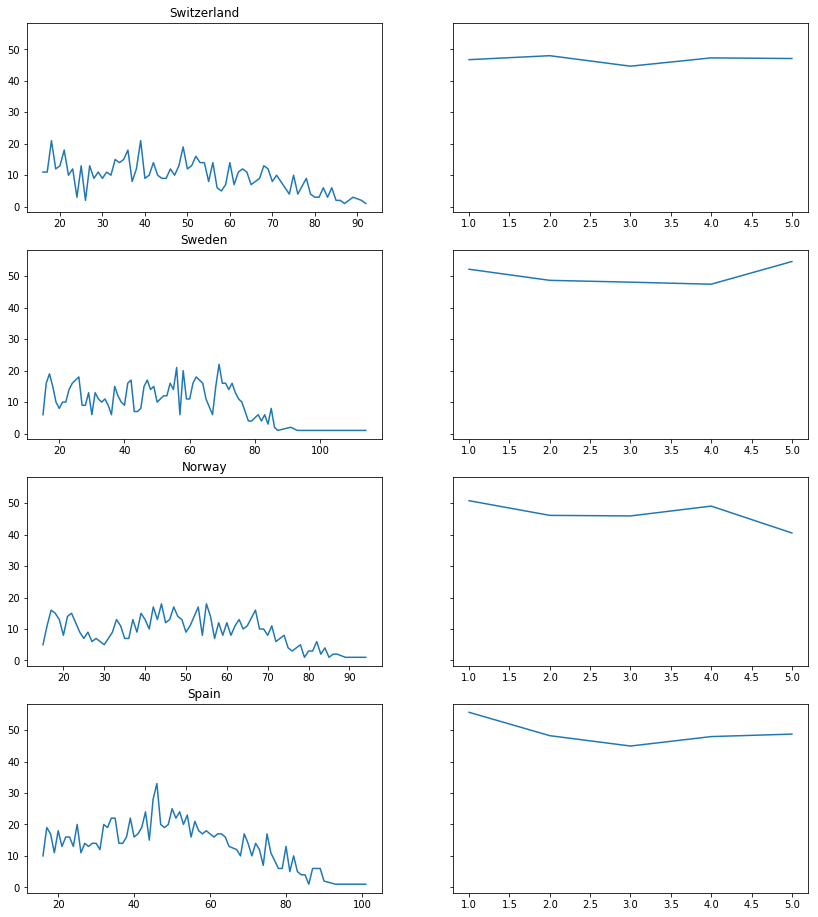

In [102]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(14, 16), sharey = True)

ax1.set_title('Switzerland')
ax1.plot(swiss_14.groupby('agea')['sclact'].agg('count'))
ax2.plot(swiss_14.groupby('sclact').agg({'agea': 'mean'}))

ax3.set_title('Sweden')
ax3.plot(sweden_14.groupby('agea')['sclact'].agg('count'))
ax4.plot(sweden_14.groupby('sclact').agg({'agea': 'mean'}))

ax5.set_title('Norway')
ax5.plot(norway_14.groupby('agea')['sclact'].agg('count'))
ax6.plot(norway_14.groupby('sclact').agg({'agea': 'mean'}))

ax7.set_title('Spain')
ax7.plot(spain_14.groupby('agea')['sclact'].agg('count'))
ax8.plot(spain_14.groupby('sclact').agg({'agea': 'mean'}))

plt.show()

In [107]:
countries = [sweden_14, norway_14, spain_14, swiss_14]

for country in countries:
    country = country.reset_index(drop=True)
    print('\n'+country['cntry'][0] +':')
    print(country.groupby('agea')['sclact'].describe().sort_values(by='mean', ascending=False).head(20))


SE:
      count      mean       std  min   25%  50%   75%  max
agea                                                      
95.0    1.0  4.000000       NaN  4.0  4.00  4.0  4.00  4.0
86.0    2.0  4.000000  1.414214  3.0  3.50  4.0  4.50  5.0
74.0   13.0  3.461538  0.967418  2.0  3.00  3.0  4.00  5.0
76.0   10.0  3.300000  0.483046  3.0  3.00  3.0  3.75  4.0
31.0   13.0  3.230769  0.599145  2.0  3.00  3.0  4.00  4.0
30.0    6.0  3.166667  0.752773  2.0  3.00  3.0  3.75  4.0
17.0   19.0  3.157895  0.834210  1.0  3.00  3.0  4.00  4.0
73.0   16.0  3.125000  0.619139  2.0  3.00  3.0  3.25  4.0
35.0    9.0  3.111111  1.054093  2.0  2.00  3.0  4.00  5.0
40.0    9.0  3.111111  0.600925  2.0  3.00  3.0  3.00  4.0
19.0   10.0  3.100000  0.567646  2.0  3.00  3.0  3.00  4.0
33.0   10.0  3.100000  0.994429  1.0  3.00  3.0  4.00  4.0
34.0   11.0  3.090909  1.136182  1.0  2.50  3.0  4.00  5.0
69.0   22.0  3.090909  0.750180  2.0  3.00  3.0  3.00  5.0
29.0   13.0  3.076923  0.862316  2.0  2.00  3.0  4.

In [103]:
results = f_oneway(swiss_14[['sclact', 'agea']],
                   sweden_14[['sclact', 'agea']],
                   spain_14[['sclact', 'agea']],
                   norway_14[['sclact', 'agea']])

print("The Statistic is: {}.\nThe P-Value is: {}".format(results.statistic, 
                                                           results.pvalue))

The Statistic is: [13.8849047   2.61553355].
The P-Value is: [5.37719348e-09 4.94704076e-02]
